<a href="https://colab.research.google.com/github/prabhrajsingh/Internship/blob/master/ORA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install swifter
!pip install tensorflow==2.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 830.9/830.9 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for swifter: filename=swifter-1.3.4-py3-none-any.whl size=16322 sha256=cf05dd79f50444d1674ea010bd0f21b48fd5700813fac9e8795bfc0f9f4b4f6a
  Stored in directory: /root/.cache/pip/wheels/29/a7/0e/3a8f17ac69d759e1e93647114bc9bdc95957e5b0cbfd405205
Successfully built swifter
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.3/86.3 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 449.9/449.9 kB 17.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.7 MB/s eta 0:00:00
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=fd4d038fcedf91ae884917f9a9f512bb70662d3027f4aa3783ab5466e5d383a8
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os

In [ ]:
DATASET_PATH = "/kaggle/input/fashion-product-images-small/"
print(os.listdir(DATASET_PATH))

['myntradataset', 'images', 'styles.csv']


In [ ]:
df = pd.read_csv(DATASET_PATH + "styles.csv", nrows=5000, error_bad_lines=False)
df['image'] = df.apply(lambda row: str(row['id']) + ".jpg", axis=1)
df = df.reset_index(drop=True)
df.head(10)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012,Casual,Puma Men Grey T-shirt,53759.jpg
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011,Casual,Inkfruit Mens Chain Reaction T-shirt,1855.jpg
6,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012,Ethnic,Fabindia Men Striped Green Shirt,30805.jpg
7,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012,Casual,Jealous 21 Women Purple Shirt,26960.jpg
8,29114,Men,Accessories,Socks,Socks,Navy Blue,Summer,2012,Casual,Puma Men Pack of 3 Socks,29114.jpg
9,30039,Men,Accessories,Watches,Watches,Black,Winter,2016,Casual,Skagen Men Black Watch,30039.jpg


In [ ]:
import cv2
def plot_figures(figures, nrows = 1, ncols=1,figsize=(8, 8)):
    """Plot a dictionary of figures.

    Parameters
    ----------
    figures : <title, figure> dictionary
    ncols : number of columns of subplots wanted in the display
    nrows : number of rows of subplots wanted in the figure
    """

    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows,figsize=figsize)
    for ind,title in enumerate(figures):
        axeslist.ravel()[ind].imshow(cv2.cvtColor(figures[title], cv2.COLOR_BGR2RGB))
        axeslist.ravel()[ind].set_title(title)
        axeslist.ravel()[ind].set_axis_off()
    plt.tight_layout() # optional

def img_path(img):
    return DATASET_PATH+"/images/"+img

def load_image(img):
    return cv2.imread(img_path(img))

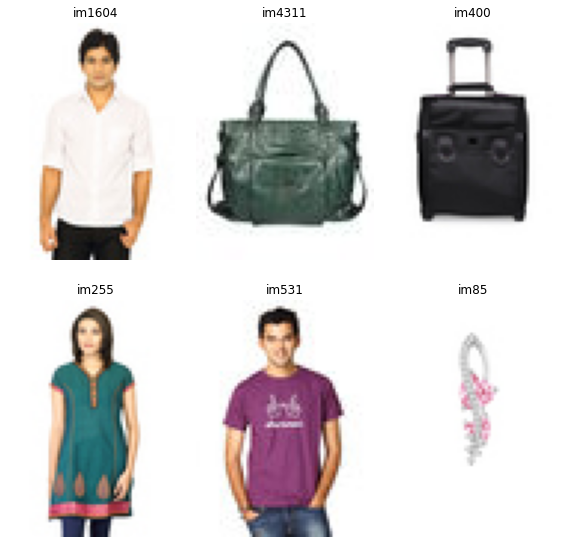

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
figures = {'im'+str(i): load_image(row.image) for i, row in df.sample(6).iterrows()}
plot_figures(figures, 2, 3)

<AxesSubplot:>

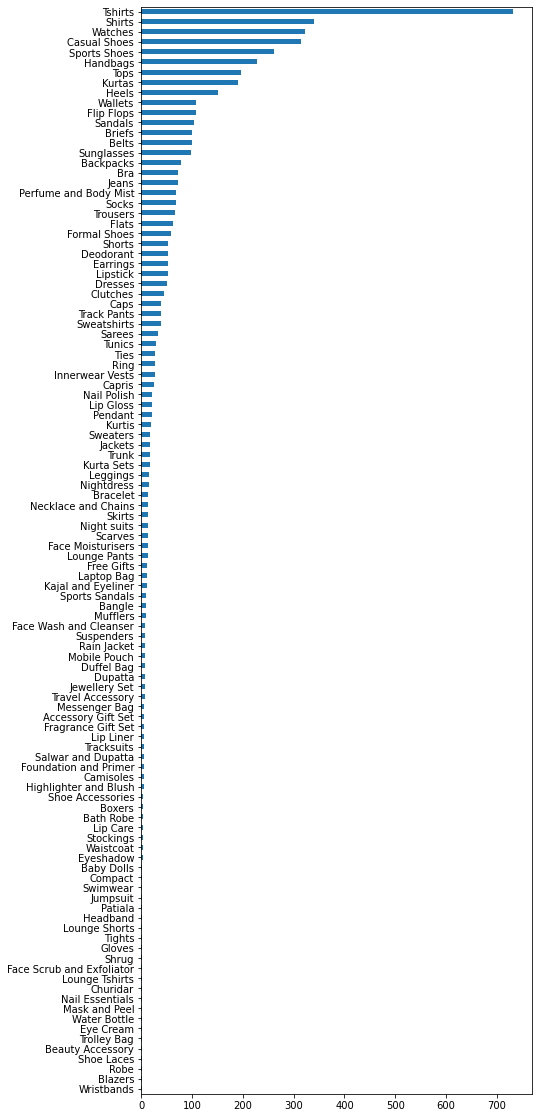

In [ ]:
plt.figure(figsize=(7,20))
df.articleType.value_counts().sort_values().plot(kind='barh')

In [ ]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications.vgg16 import VGG16

tf.__version__

'2.0.0'

In [ ]:
# Pre-Trained Model
img_width,img_height,_ = 224,224,3
base_model = VGG16(weights = 'imagenet',
                   include_top = False,
                   input_shape = (img_width,img_height,3))

# Add Layer Embedding
model = tf.keras.Sequential([
    base_model,
    GlobalMaxPooling2D()
])

model.summary()

2022-12-02 12:08:20.629853: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2022-12-02 12:08:20.635717: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2199995000 Hz
2022-12-02 12:08:20.636209: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x558c156cf930 executing computations on platform Host. Devices:
2022-12-02 12:08:20.636247: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): Host, Default Version


58892288/58889256 [==============================] - 5s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_max_pooling2d (Global (None, 512)               0         
Total params: 14,714,688
Trainable params: 14,714,688
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def get_embedding(model, img_name):
    # Reshape
    img = image.load_img(img_path(img_name), target_size=(img_width, img_height))
    # img to Array
    x   = image.img_to_array(img)
    # Expand Dim (1, w, h)
    x   = np.expand_dims(x, axis=0)
    # Pre process Input
    x   = preprocess_input(x)
    return model.predict(x).reshape(-1)

[  0.           0.           6.0835247    0.          16.547882
  24.478874    14.022753     7.2809796   36.898624     0.
  20.948969    11.6967      59.508297     0.          26.11149
  30.342882    15.2843      34.28094      0.          59.771427
  11.08328     19.877125    47.51289      0.          27.174433
   0.           7.8596506   11.690232    34.996517    26.032331
  24.766571     0.          19.226685     0.          23.007584
   4.161509     7.858486    20.971876     0.           0.
  21.138136    18.502838    47.9256      26.361147   107.42896
  19.11154     22.361837    67.47388      0.          37.379852
  78.32013     26.440125    45.616783     3.356518    27.90317
   9.336339     3.7013502    8.630106    20.229998    23.184635
   0.          13.651258    43.735752    32.90072      0.
  15.864454     0.           0.          22.610102    16.8431
   0.          37.02329     16.116571    40.141407     0.
   2.1200545    0.          31.100018     0.           7.2883997
   0

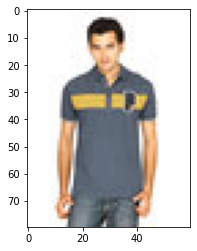

In [ ]:
emb = get_embedding(model, df.iloc[1].image)
emb.shape
plt.imshow(cv2.cvtColor(load_image(df.iloc[2774].image), cv2.COLOR_BGR2RGB))
print(emb)

In [ ]:
#get embedding for all images in our dataset
import swifter

# Parallel apply
map_embeddings = df['image'].swifter.apply(lambda img: get_embedding(model, img))
df_embs        = map_embeddings.apply(pd.Series)

print(df_embs.shape)
df_embs.head()

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

(5000, 512)


,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,30.111641,0.000000,36.945709,0.000000,15.156024,6.308314,11.563580,0.000000,32.477745,0.000000,...,0.000000,23.078497,0.000000,8.912200,0.000000,26.705198,19.136963,0.000000,9.023550,1.847754
1,0.000000,0.000000,6.083525,0.000000,16.547882,24.478874,14.022753,7.280980,36.898624,0.000000,...,0.000000,64.777763,0.000000,21.648508,0.000000,20.778307,35.637482,0.000000,43.800938,7.511487
2,71.445702,0.149200,0.000000,78.734596,0.000000,5.777625,46.573101,0.000000,5.216085,23.036545,...,0.084438,0.000000,1.313996,0.000000,0.000000,25.405758,9.973008,0.000000,11.206234,0.000000
3,4.960739,11.385839,0.000000,0.000000,20.224377,26.026926,38.720936,9.659372,20.998350,0.000000,...,0.000000,137.025513,0.000000,9.216279,19.421829,14.997119,49.465954,1.890029,5.897567,0.753226
4,12.635268,0.000000,1.756640,0.000000,23.259052,16.987366,11.820072,21.016682,24.071859,0.000000,...,0.000000,54.992832,0.000000,2.899186,0.000000,18.610659,89.455856,0.000000,33.367168,0.000000


In [ ]:
#compute cosine similarity

from sklearn.metrics.pairwise import pairwise_distances

# Calcule DIstance Matriz
cosine_sim = 1-pairwise_distances(df_embs, metric='cosine')
cosine_sim[:4, :4]

array([[0.9999999 , 0.6972713 , 0.50980425, 0.62635624],
       [0.6972713 , 1.        , 0.41237366, 0.7529457 ],
       [0.50980425, 0.41237366, 1.        , 0.4253224 ],
       [0.62635624, 0.7529457 , 0.4253224 , 1.        ]], dtype=float32)

In [ ]:
indices = pd.Series(range(len(df)), index=df.index)
indices

# Function that get movie recommendations based on the cosine similarity score of movie genres
def get_recommender(idx, df, top_n = 5):
    sim_idx    = indices[idx]
    sim_scores = list(enumerate(cosine_sim[sim_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    idx_rec    = [i[0] for i in sim_scores]
    idx_sim    = [i[1] for i in sim_scores]

    return indices.iloc[idx_rec].index, idx_sim

get_recommender(2993, df, top_n = 5)

(Int64Index([3899, 634, 1389, 4092, 2216], dtype='int64'),
 [0.8569846, 0.8553733, 0.8522283, 0.84657454, 0.84620535])

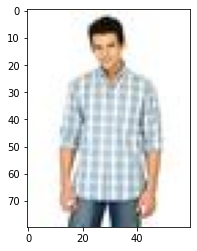

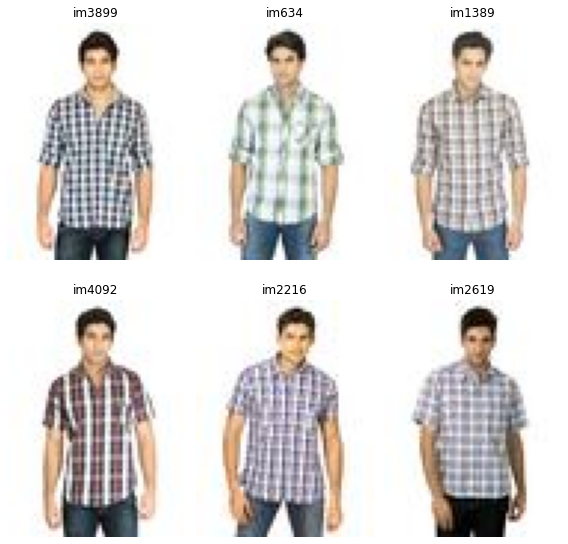

In [ ]:
# Idx Item to Recommender
idx_ref = 2993

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, df, top_n = 6)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

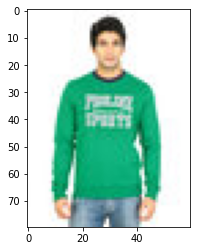

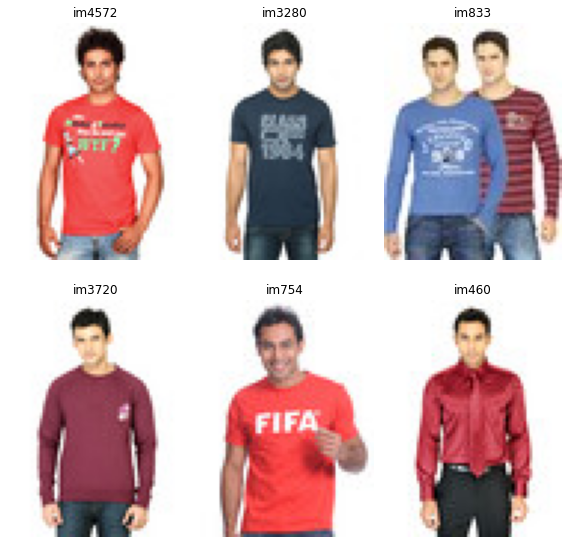

In [ ]:
idx_ref = 1809

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, df, top_n = 6)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

[  0.           0.           6.0835247    0.          16.547882
  24.478874    14.022753     7.2809796   36.898624     0.
  20.948969    11.6967      59.508297     0.          26.11149
  30.342882    15.2843      34.28094      0.          59.771427
  11.08328     19.877125    47.51289      0.          27.174433
   0.           7.8596506   11.690232    34.996517    26.032331
  24.766571     0.          19.226685     0.          23.007584
   4.161509     7.858486    20.971876     0.           0.
  21.138136    18.502838    47.9256      26.361147   107.42896
  19.11154     22.361837    67.47388      0.          37.379852
  78.32013     26.440125    45.616783     3.356518    27.90317
   9.336339     3.7013502    8.630106    20.229998    23.184635
   0.          13.651258    43.735752    32.90072      0.
  15.864454     0.           0.          22.610102    16.8431
   0.          37.02329     16.116571    40.141407     0.
   2.1200545    0.          31.100018     0.           7.2883997
   0

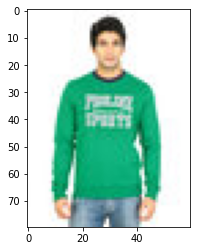

In [ ]:
emb = get_embedding(model, df.iloc[1].image)
emb.shape
plt.imshow(cv2.cvtColor(load_image(df.iloc[1809].image), cv2.COLOR_BGR2RGB))
print(emb)